# Ultimate Take-Home Test

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Part 1 - Exploratory Data Analysis

In [3]:
df = pd.read_json('logins.json')

In [4]:
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [5]:
df.shape

(93142, 1)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [16]:
print(df.isnull().sum())

login_time    0
dtype: int64


In [31]:
# create a variable to keep a count of number of logins
df['login_count'] = 1
# reset index to be the datetime object so that we can resample
df15 = df.set_index('login_time').resample('15min').count()
df15.head()

,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [50]:
df15.describe()

,login_count
count,9788.000000
mean,9.515938
std,8.328818
min,0.000000
25%,3.000000
50%,7.000000
75%,13.000000
max,73.000000


## We are going to add features to our dataframe so that we can look at some specifics like:
- Day of week
- Month

In [324]:
df15['minute_of_day'] = df15.index.map(lambda x: (x.hour * 60) + x.minute)
df15['day_of_week'] = df15.index.day_name()
df15['date'] = df15.index.date
df15['month'] = df15.index.month_name()
df15.head()

,login_count,minute_of_day,day_of_week,date,month
login_time,,,,,
1970-01-01 20:00:00,2,1200,Thursday,1970-01-01,January
1970-01-01 20:15:00,6,1215,Thursday,1970-01-01,January
1970-01-01 20:30:00,9,1230,Thursday,1970-01-01,January
1970-01-01 20:45:00,7,1245,Thursday,1970-01-01,January
1970-01-01 21:00:00,1,1260,Thursday,1970-01-01,January


## By day of week

In [296]:
# check work days in the dataframe
df15.day_of_week.unique()

array(['Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday',
       'Wednesday'], dtype=object)

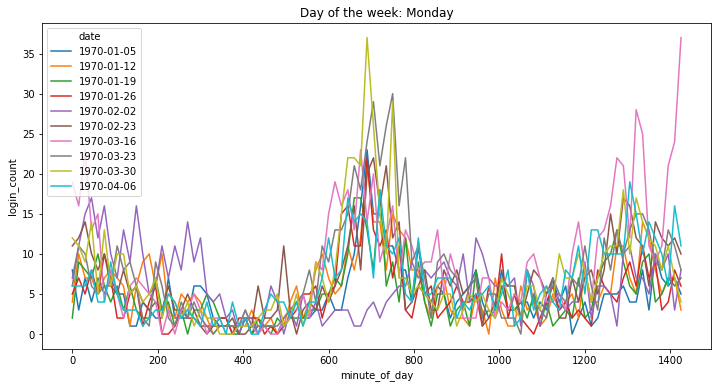

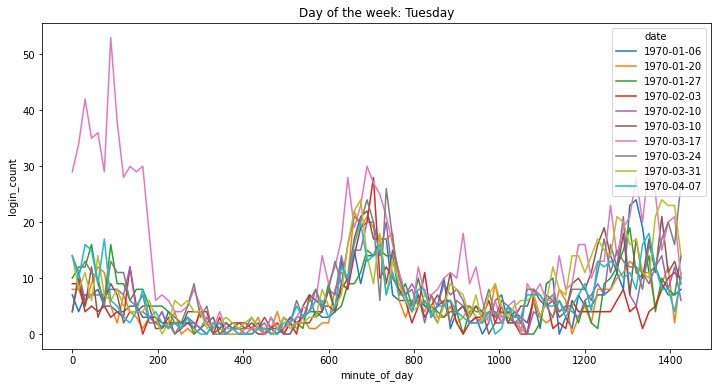

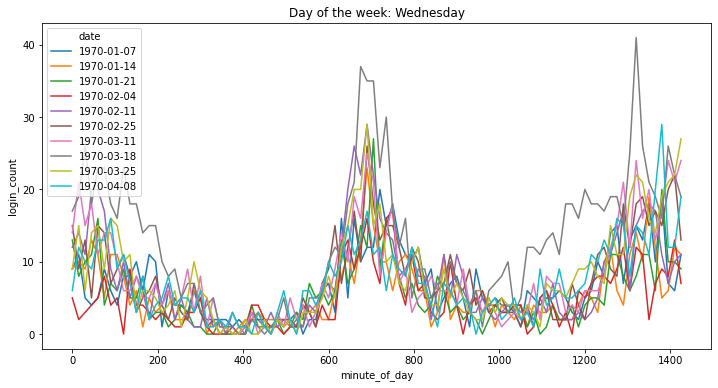

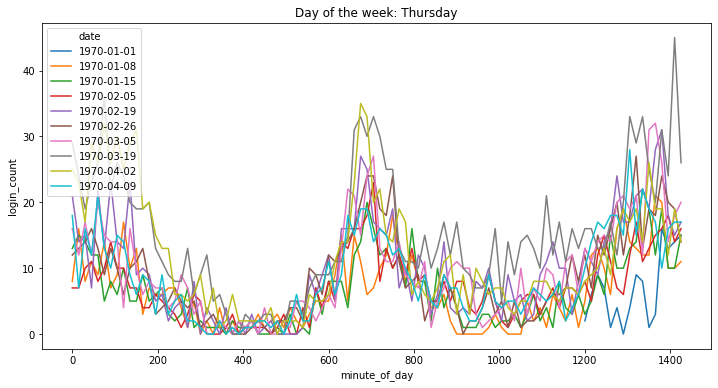

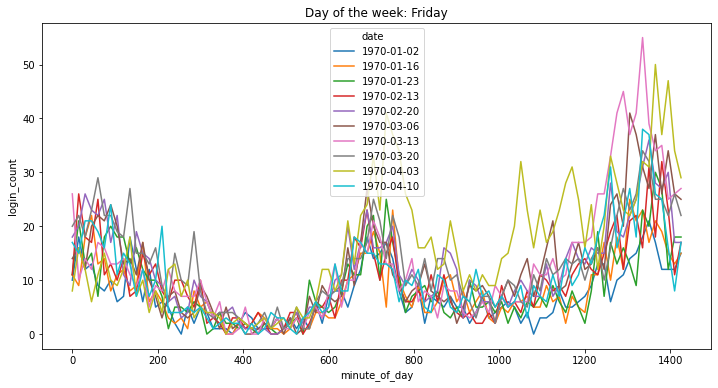

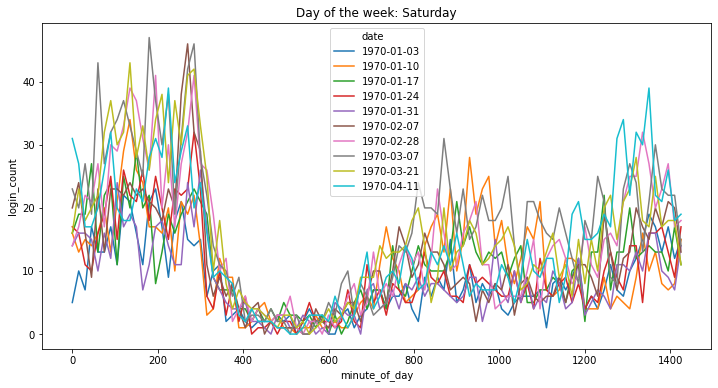

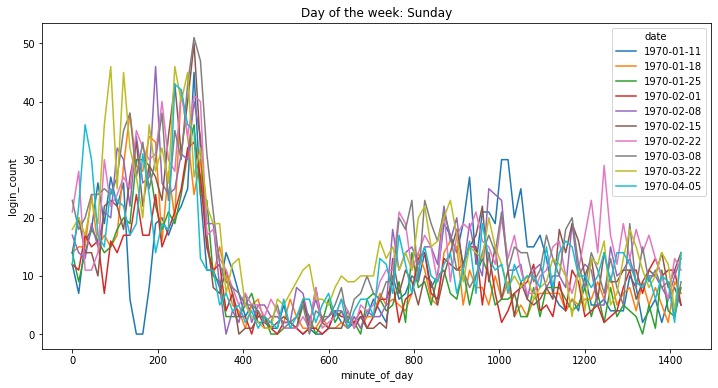

In [295]:
import random

# order weekdays starting with Monday
for day in ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']:
    # create dataframe with only one type of day
    df_DOW = df15[df15['day_of_week']==day].copy()
    # iterate over 5 randowm days
    plt.figure(figsize=(12,6))
    usedays = []
    for n in range(10):
        while True:
            pick = random.choice(list(df_DOW['date'].unique()))
            if pick not in usedays:
                usedays.append(pick)
                break
    dfplot = df_DOW.where(df_DOW['date'].isin(usedays)).dropna()
    sns.lineplot(x='minute_of_day', y='login_count', hue='date', data=dfplot)
    plt.title('Day of the week: %s' % day)

## By month
We will exclude weekend days since we can see the hours are very different.

In [287]:
df15.head()

,login_count,minute_of_day,day_of_week,date,month
login_time,,,,,
1970-01-01 20:00:00,2,1200,Thursday,1970-01-01,January
1970-01-01 20:15:00,6,1215,Thursday,1970-01-01,January
1970-01-01 20:30:00,9,1230,Thursday,1970-01-01,January
1970-01-01 20:45:00,7,1245,Thursday,1970-01-01,January
1970-01-01 21:00:00,1,1260,Thursday,1970-01-01,January


In [297]:
df15.month.unique()

array(['January', 'February', 'March', 'April'], dtype=object)

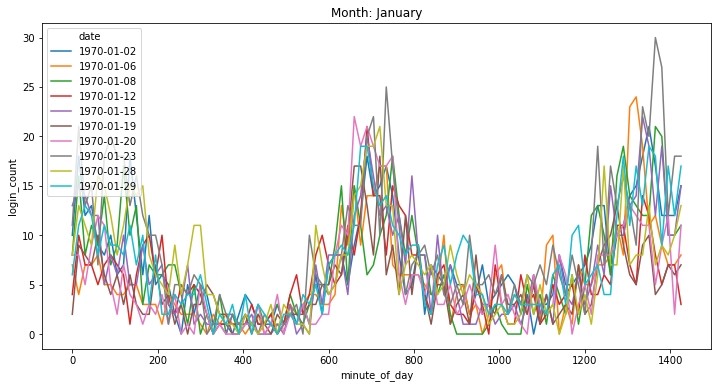

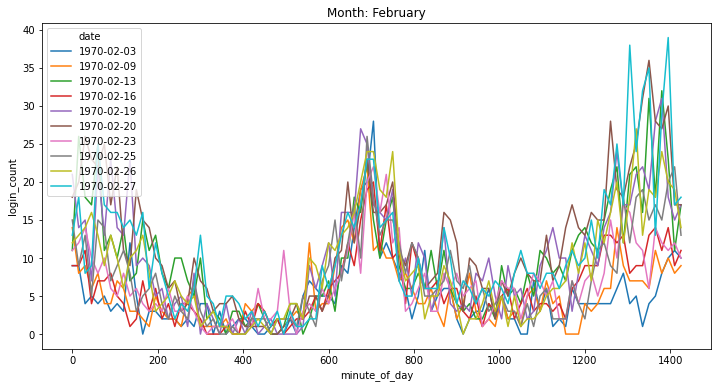

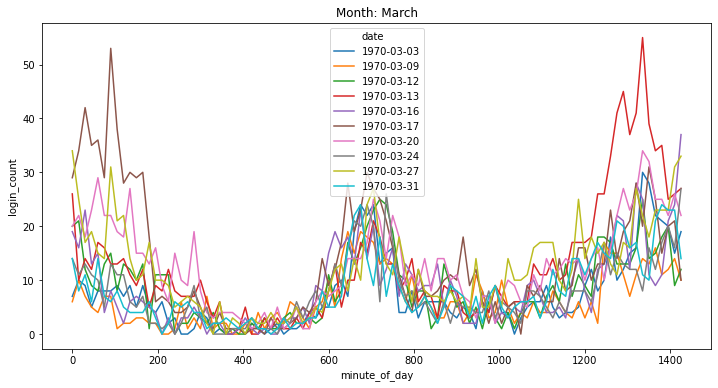

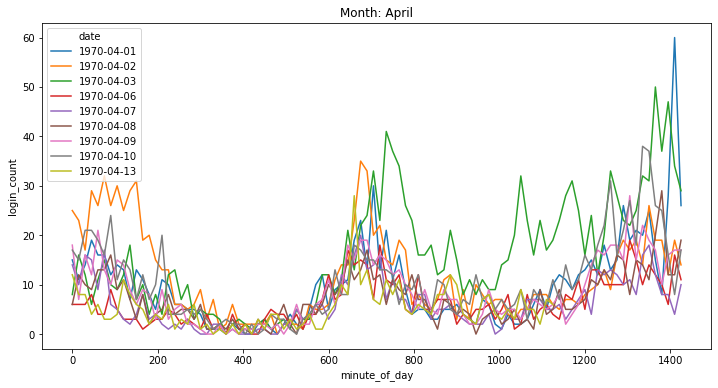

In [366]:
import random

for month in list(df15.month.unique()):
    # create dataframe with only one type of day
    days = ['Monday','Tuesday','Wednesday','Thursday','Friday']
    df_month = df15[(df15['month']==month) & (df15['day_of_week'].isin(days))].copy()
    # iterate over 5 randowm days
    plt.figure(figsize=(12,6))
    use = []
    for n in range(min(10, len(list(df_month['date'].unique())))):
        while True:
            pick = random.choice(list(df_month['date'].unique()))
            if pick not in use:
                use.append(pick)
                break
    dfplot = df_month.where(df_month['date'].isin(use)).dropna()
    sns.lineplot(x='minute_of_day', y='login_count', hue='date', data=dfplot)
    plt.title('Month: %s' % month)

### Brief:
- We looked at the login frequency by day of week and by month (for climate considerations)
- Typical work-week logins have a very stable pattern - roughly 2 main login periods throughout the day (on hour 0 and 12)
    - Chart shows 3 periods, but the first and last are on roughly the same hour
    - Other than a few spikes from the random samples that we took, the login count seems to follow the same pattern daily for our data. This could be caused by data quality issues which we would be able to remove with outlier or anomaly filtering.
- Weekends have a much different pattern, more logins in the 0 hour preceeded by a slow period, and then a consistent flow after the 12 hour.

# Lets look at the count flow throughout the months and see if anything stands out

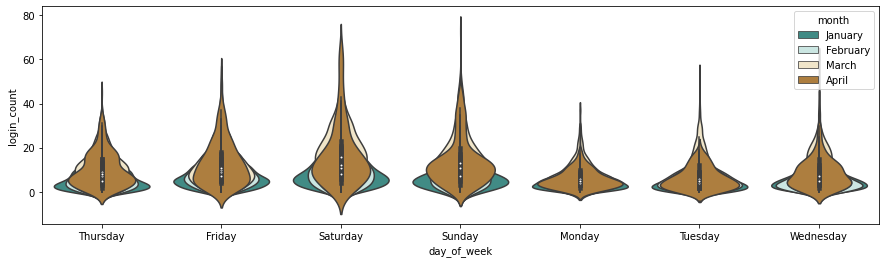

In [390]:
plt.figure(figsize=(15,4))
_=sns.violinplot(x='day_of_week', y='login_count', data=df15, hue='month', dodge=False, palette='BrBG_r')

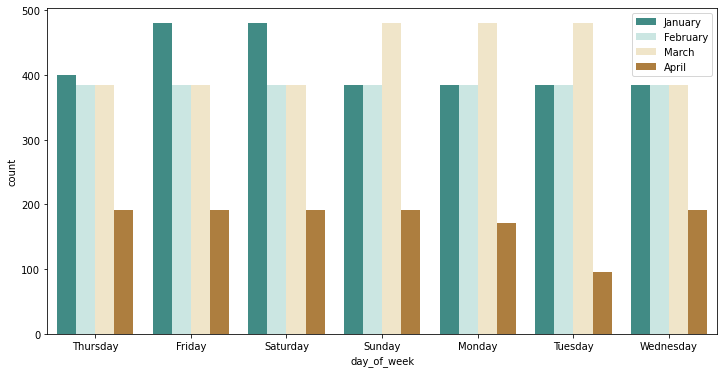

In [402]:
plt.figure(figsize=(12,6))
sns.countplot(x='day_of_week', data=df15, hue='month', dodge=True, palette='BrBG_r')
_=plt.legend(loc='best')

### Brief:
- The weekend days tend to have bigger spikes of logins throughout the days (this is because of our surge in the 0 hour, and more stable flow throughout the noon hour)
- In the month of January there was a higher login count on Thursday-Saturday. This is compared to the month of March where there were more logins from Sunday-Tuesday.
- February has a consistent count throughout the week days.
- There isn't sufficient data for April which is why the lower count.

## Part 2 ‑ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities. However, a toll bridge, with a two way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
    - `To monitor success of the experiment, I would simply monitor the increase in nightly toll count for Gotham, and increase in daily toll count for Metropolis - per the week days. Even so, we could just monitor toll count throughout the weeks to see if there is an influx.`
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
     - *how you will implement the experiment.*
         - `By monitoring license plates as they cross the toll and identifying which city the partner resides in.`
     - *what statistical test(s) you will conduct to verify the significance of the observation*
         - `A simple null hypothesis which states that there is no difference in the frequency of toll count throughout, use a z-test to reject the null hypothesis.`
     - *how you would interpret the results and provide recommendations to the city operations team along with any caveats.*
         - `If the null hypothesis is rejected, then we can conclude that our experiment worked and the incentive helps partners traverse cities. If it isn't rejected, then we would need to consider alternative incentives - maybe a reward of some type to travel across cities rather than just paying for toll fees. Maybe the reason they don't travel across cities often is simply because they don't want to drive.`

## Part 3 ‐ Predictive modeling

In [404]:
df = pd.read_json('ultimate_data_challenge.json')
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [406]:
df.shape

(50000, 12)

In [407]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


Describe the numerical data

In [408]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


Look at the categorical columns

In [411]:
df.select_dtypes('object').head()

,city,signup_date,last_trip_date,phone
0,King's Landing,2014-01-25,2014-06-17,iPhone
1,Astapor,2014-01-29,2014-05-05,Android
2,Astapor,2014-01-06,2014-01-07,iPhone
3,King's Landing,2014-01-10,2014-06-29,iPhone
4,Winterfell,2014-01-27,2014-03-15,Android


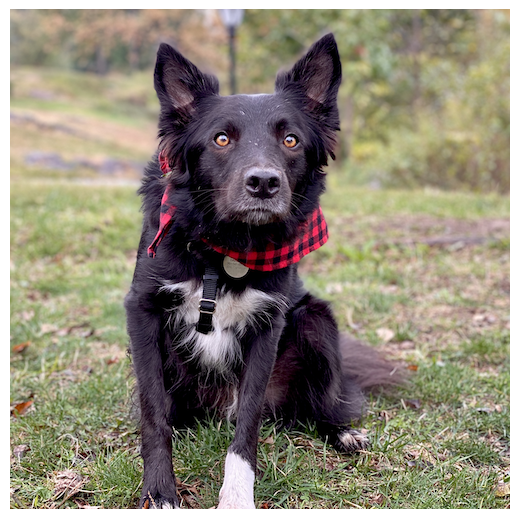

In [395]:
sns.dogplot()